### Create a function J(theta_i) which is implementing the function J(θ) described above What is the value of J(4) 

In [37]:
import matplotlib.pyplot as plt  
import numpy as np


def J(theta_i):
    return (theta_i + 1)**2
    
print(J(4))


25


### Generate data point between -10 and 10 with a step of 0.01 between each data point and store it into a list called theta

In [38]:
theta = list(np.arange(-10,10,0.01))

### Plot theta vs J(theta). When do we reach the minimum?

In [41]:
theta[:10]


[-10.0,
 -9.99,
 -9.98,
 -9.97,
 -9.96,
 -9.950000000000001,
 -9.940000000000001,
 -9.930000000000001,
 -9.920000000000002,
 -9.910000000000002]

In [42]:
J_theta[:10]

[81.0,
 80.82010000000001,
 80.64040000000001,
 80.46090000000001,
 80.28160000000001,
 80.10250000000002,
 79.92360000000002,
 79.74490000000003,
 79.56640000000003,
 79.38810000000004]

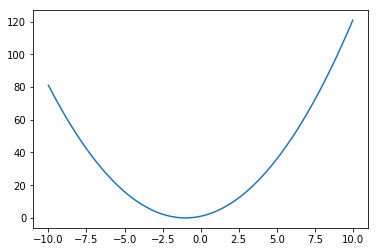

In [43]:
J_theta=[J(i) for i in theta]

plt.plot(theta, J_theta)


### Create a function dJ_dtheta(x_i) which is computing the gradient ∂J ∂θ . What is the value of dJ_theta(0)

In [55]:
def dJ_dtheta(x_i):
    return 2*(x_i + 1)

print("dJ_dtheta de -1 : ") 
(-1)

dJ_dtheta de -1 : 


0

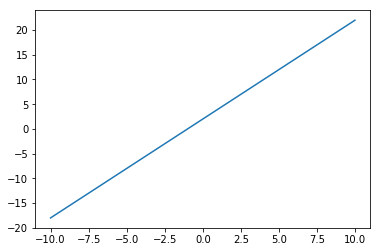

In [60]:
DJ_theta=[dJ_dtheta(i) for i in theta]

plt.plot(theta, DJ_theta)

### Create a function gradient_descent(theta_0, lr, nb_iters, df_dx, f) which returns the solution of argmin θ f(θ). 

In [161]:
def gradient_descent(theta_0, lr, nb_iters, dJ_dtheta,J):
    theta = theta_0   
    for t in range(nb_iters):
        plt.plot(theta, J(theta), marker='o',markersize=3,color='red')
        theta= theta - lr * dJ_dtheta(theta)
    return theta

### x_0, lr, nb_iters, df_dx, f correspond respectively to the initial value of θ, the learning rate, the number of iterations allowed for solving the problem, the gradient of θ and the function J(.). 

### What is the solution ˆθ found by gradient descent to our problem? Note: assume that x_0, lr, nb_iters = -7, 0.1, 100 while debugging.


-5575705124.213889

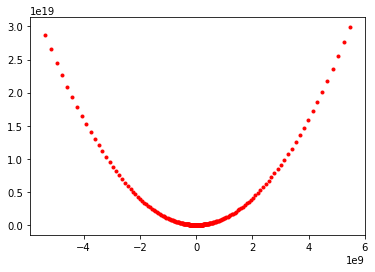

In [167]:
gradient_descent(-15,1.01,1000,dJ_dtheta, J)


### Ex2 : 


In [171]:
list_x = list(np.random.uniform(20,40,100))

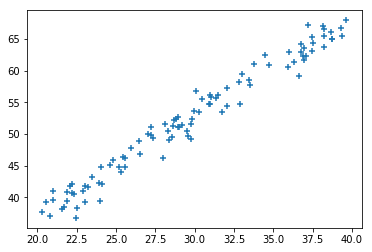

In [184]:
def Y(i):
    return 1.5*(i+5+np.random.normal(0,1))

list_y=[Y(i) for i in list_x]

plt.scatter(list_x,list_y,marker='+')

# Close form method

In [220]:
#Close form method
list_one= np.ones((100))
X = np.stack((list_one, list_x), axis=-1)
#X.shape

Xt = np.transpose(X)
Xcalc1 = np.dot(Xt,X)
#Xcalc1.shape

Xinv = np.linalg.inv(Xcalc1)
Xinv.shape
Xcalc2 = np.dot(Xinv,Xt)
Y = np.asarray(list_y)
#Y.shape

B= np.dot(Xcalc2,Y)
b_cf, w_cf = B[0],B[1]
print(f"w={w_cf:.2f} b={b_cf:.2f}")

w=1.56 b=6.03


In [229]:
def loss(x_i, y_i, w, b):
    return (w*x_i + b -y_i)**2

loss(1,3,1,2)

0

In [231]:
def dl_dw(x_i, y_i, w, b):
    return -2 * x_i * (y_i - (w * x_i + b))

dl_dw(4, -1, 0, 0)

8

In [232]:
def dl_db(x_i, y_i, w, b):
    return -2 * (y_i - (w * x_i + b))

dl_db(3,3,0,0)

-6

In [257]:
def update_w_and_b(x, y, w, b, lr):
    
    grad_w = 0
    grad_b = 0
    N = len(y)
    
    for i in range(N):
        grad_w += dl_dw(x[i], y[i], w, b)
        grad_b += dl_db(x[i], y[i], w, b)
        
        w -= (1/ float(N)) * grad_w * lr
        b -= (1/ float(N)) * grad_b * lr
        
    return w, b


update_w_and_b([0], [3], 5, 3, 0.1) 

(5.0, 3.0)

# Cours 19/12/2018 - Regression & Classification


In [1]:
import matplotlib

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [2]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [8]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [43]:
X = boston['data']

In [44]:
y = boston['target']

In [45]:
X.shape

(506, 13)

In [46]:
y.shape

(506,)

In [50]:
print(y.max)
print(y.min)


<built-in method max of numpy.ndarray object at 0x000001BC326AA300>
<built-in method min of numpy.ndarray object at 0x000001BC326AA300>


Plot target vs CRIM

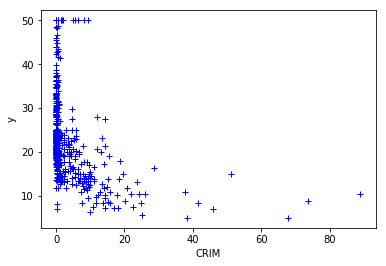

In [54]:
crim = X[:,0]
plt.plot(crim,y,'b+')
plt.xlabel("CRIM")
plt.ylabel("y")
plt.show()

Plot target vs log(CRIM)

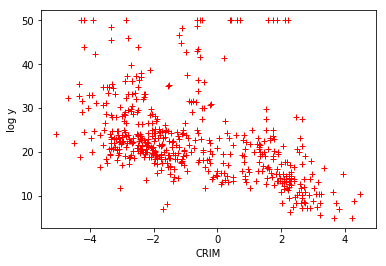

In [86]:
crimlog = np.log(crim)
plt.plot(crimlog,y,'r+')
plt.xlabel("CRIM")
plt.ylabel("log y")
plt.show()


In [59]:
def MinMaxNormal(x):
    min_x, max_x = np.min(x), np.max(x)
    x = (x - min_x)/(max_x - min_x)
    return x

In [61]:
np.min(y)

5.0

In [63]:
y_norm = MinMaxNormal(y)
np.min(y_norm)

0.0

In [64]:
np.max(y_norm)

1.0

In [65]:
model = LinearRegression()

In [66]:
N_train = 300

In [68]:
model.fit(crim[:N_train].reshape(-1,1),y[:N_train])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
model.coef_

array([-2.80245735])

In [74]:
model.intercept_

26.704985323741095

In [81]:
Train_predic = model.predict(crim[:N_train].reshape(-1,1))

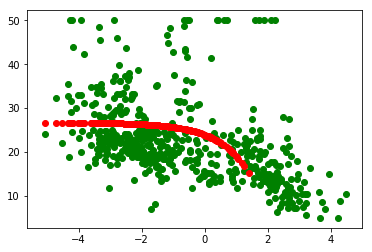

In [96]:
plt.scatter(crimlog,y,c='g')


plt.scatter(crimlog[:N_train],Train_predic[:N_train], c='r')
plt.show()


In [101]:
def mse(preds,y):
    errors = (preds-y)**2
    return np.mean(errors)


In [102]:
mse(Train_predic,y[:N_train])

75.20682846162597

In [104]:
mse(model.predict(crim[300:400].reshape(-1,1)),y[300:400])

932.9255481150864

In [105]:
model.fit(crim[:N_train].reshape(-1,1),np.log(y[:N_train]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
mse(np.exp(model.predict(crim[:300].reshape(-1,1))),y[:300])

76.78695063147181

In [107]:
mse(np.exp(model.predict(crim[300:400].reshape(-1,1))),y[300:400])

124.08262131832224

In [108]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
model = model.fit(boston['ZN'])

zn = X[:,1]

